In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt 

In [2]:
# dir_path = os.path.dirname(os.path.realpath(__file__))
# record_export_folder = os.path.join(record_export_folder, 'recordings')
record_export_folder = 'recordings'
file_path = os.path.join(record_export_folder, 'name_18.09.20_14.31.07.md.pm.bp.csv')

In [3]:
df = pd.read_csv(file_path, skiprows=0, header=1)

In [4]:
keep_cols = ['Timestamp', 'EEG.Counter', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8']

In [5]:
trimmed_df = df[keep_cols]

In [6]:
trimmed_df.head

<bound method NDFrame.head of          Timestamp  EEG.Counter       EEG.P7       EEG.O1       EEG.O2  \
0     1.600454e+09         11.0  4681.538574  4061.025635  3944.102539   
1     1.600454e+09         12.0  4672.307617  4047.692383  3923.589844   
2     1.600454e+09         13.0  4691.794922  4051.794922  3935.897461   
3     1.600454e+09         14.0  4715.897461  4073.333252  3966.666748   
4     1.600454e+09         15.0  4695.897461  4064.615479  3940.512939   
...            ...          ...          ...          ...          ...   
3833  1.600454e+09        103.0  4669.743652  4025.128174  3901.025635   
3834  1.600454e+09        104.0  4670.769043  4026.153809  3911.281982   
3835  1.600454e+09        105.0  4671.794922  4036.410156  3926.153809   
3836  1.600454e+09        106.0  4666.666504  4032.307617  3910.769287   
3837  1.600454e+09        107.0  4662.563965  4021.538574  3898.461426   

           EEG.P8  
0     4363.077148  
1     4356.922852  
2     4363.589844  
3

In [7]:
def plot_col_in_df(df, col):
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    plt.plot(df[col].values) 
    plt.show()

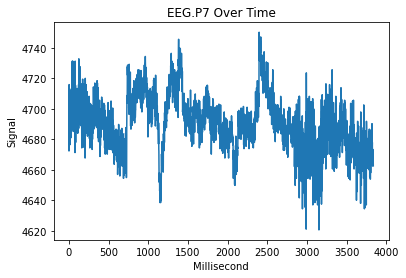

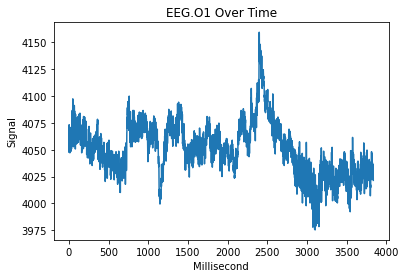

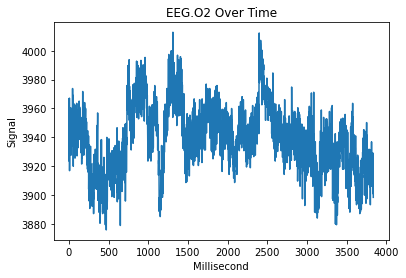

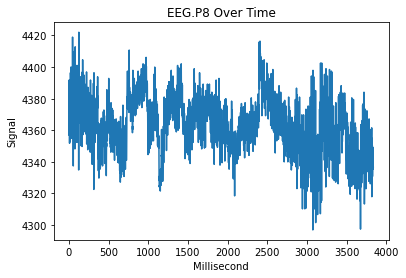

In [8]:
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df(trimmed_df, col)

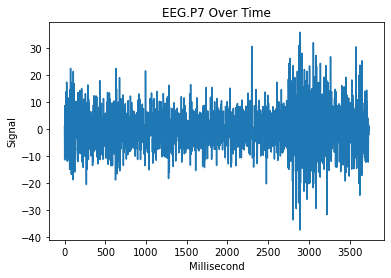

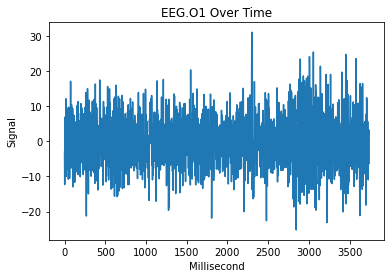

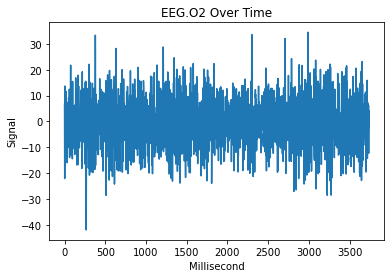

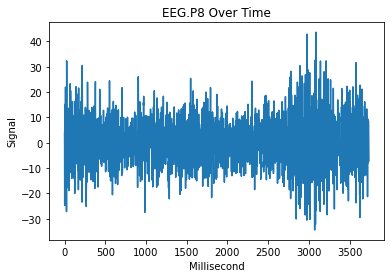

In [25]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def plot_col_in_df_filtered(df, col):
    fs = 128.0
    lowcut = 3.0
    highcut = 30.0
    
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    
    vals = df[col].values
    filtered = butter_bandpass_filter(vals, lowcut, highcut, fs)
    plt.plot(filtered[100:]) 
    plt.show()

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    # data = data * 50    # amplify data
    y = lfilter(b, a, data)
    return y


# Sample rate and desired cutoff frequencies (in Hz).

# Plot the frequency response for a few different orders.
for col in trimmed_df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df_filtered(trimmed_df, col)